**Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in predicting the quality of wine.**

Fixed Acidity: Influences wine's structure and balance, impacting taste perception.

Volatile Acidity: High levels lead to off-putting vinegar-like taste and aroma, negatively affecting quality.

Citric Acid: Enhances freshness and fruity flavors, contributing to a pleasing taste profile.

Residual Sugar: Affects sweetness and body, crucial for achieving desired taste.

Chlorides: In proper levels, contribute to complexity, but excessive amounts lead to undesirable saltiness.

Free Sulfur Dioxide: Preserves wine by preventing oxidation and microbial growth, essential for quality and longevity.

Total Sulfur Dioxide: Combined sulfur dioxide levels impact preservation and overall wine stability.

Density: Reflects alcohol and sugar concentration, indicating richness and body.

pH: Influences taste, color, and stability; maintaining optimal pH is crucial.

Sulphates: Contribute to stability and flavor enhancement, but excess can cause bitterness.

Alcohol: Impacts body, mouthfeel, and overall balance, a key factor in defining wine's character.

quality : give quality of wine.

These features collectively offer insights into the chemical composition and sensory attributes of the wine, allowing predictive models to associate them with wine quality ratings.

In [2]:
import pandas as pd

df=pd.read_csv('winequality-red.csv')
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
# Q2. How did you handle missing data in the wine quality data set during the feature 
# engineering process? Discuss the advantages and disadvantages of different imputation 
# techniques.

df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

dataset have not any missing values.

Mean/Median Imputation:

- Advantages: Simple and quick, doesn't distort the feature's distribution significantly.
- Disadvantages: Ignores potential relationships between variables, may not be accurate if missing data is not missing at random.

Mode Imputation:

- Advantages: Suitable for categorical variables, maintains the most frequent value.
- Disadvantages: Ignores interactions between variables, might not represent true distribution.

Interpolation:

- Advantages: Captures trends and patterns in the data, useful for time-series or continuous variables.
- Disadvantages: Requires assumptions about the data's behavior between known values.

K-Nearest Neighbors (KNN) Imputation:

- Advantages: Considers relationships between variables, can capture more complex patterns.
- Disadvantages: Computationally intensive, sensitive to the choice of k, may not work well for high-dimensional data.

Multiple Imputation:

- Advantages: Provides estimates of the uncertainty caused by missing data, suitable for complex datasets.
- Disadvantages: Can be computationally expensive, might not always be necessary for simpler datasets.

In [6]:
# Q3. What are the key factors that affect students' performance in exams?
#  How would you go about analyzing these factors using statistical techniques?

df2=pd.read_csv('stud.csv')
print("key features : ",df2.columns)

key features :  Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [10]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df2.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Insights or Observation
- From the above description of numerical data,all means are very close to each other- between 66 and 69
- All the standard deviation are also close- between 14.6- 15.19
- While there is a minimum of 0 for maths,other are having 17 and 10 value

 **Q4. Describe the process of feature engineering in the context of the student performance data set. How did you select and transform the variables for your model?**

Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

For model, I take gender,race/ethicity, parental level of education, lunch, reading score, writing score and test preparation course as input and give output as average of math score. 
i transform parental level of education in ranked category using ordinal encoding.

<Figure size 1200x800 with 0 Axes>

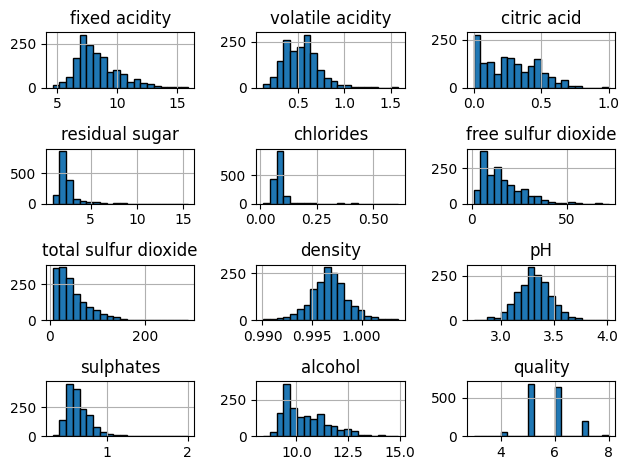

<Figure size 1200x800 with 0 Axes>

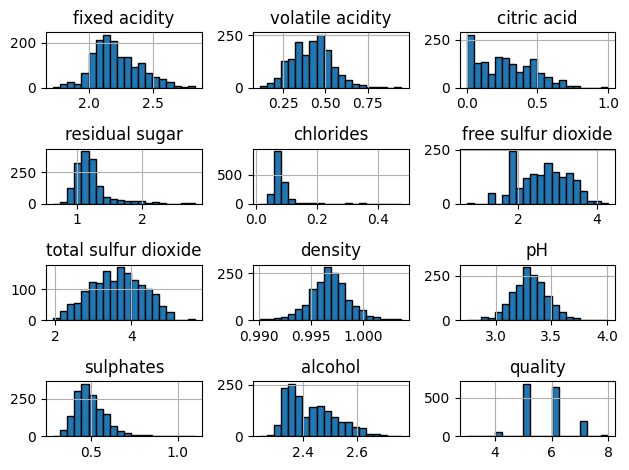

In [15]:
# Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the 
# distribution of each feature. Which feature(s) exhibit non-normality, and what transformations
#  could be applied to these features to improve normality?
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the wine quality dataset
df = pd.read_csv('winequality-red.csv')  # Replace with your actual file path

# Display summary statistics
summary_stats = df.describe()

# Plot histograms for each feature
plt.figure(figsize=(12, 8))
df.hist(bins=20, edgecolor='black')
plt.tight_layout()
plt.show()

# Detect skewness in features
skewness = df.skew()

# Identify features with significant skewness (e.g., skewness > 0.5 or <-0.5)
skewed_features = skewness[abs(skewness) > 0.5].index

# Apply transformations (e.g., log, square root) to improve normality
transformed_data = df.copy()
transformed_data[skewed_features] = transformed_data[skewed_features].apply(lambda x: np.log1p(x))

# Plot histograms of transformed features
plt.figure(figsize=(12, 8))
transformed_data.hist(bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


Minimum number of components to explain 90% variance: 7


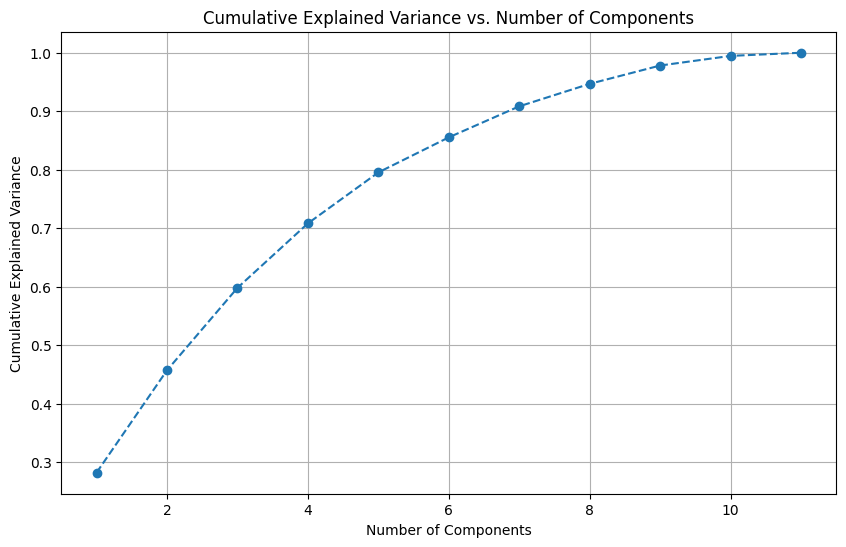

In [19]:
# Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the 
# number of features. What is the minimum number of principal components required to explain 
# 90% of the variance in the data?

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


df = pd.read_csv('winequality-red.csv')  

X = df.drop(columns=['quality']) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
min_components = next(i for i, explained_variance in enumerate(cumulative_explained_variance) if explained_variance >= 0.9) + 1

print("Minimum number of components to explain 90% variance:", min_components)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()
